In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

1. Chargement et aperçu des données


In [6]:
#Vérifier la structure des données

# Chemin des dossiers
train_path = 'DeepLearningTask-1/DeepLearning 24-25/Train'
test_path = 'DeepLearningTask-1/DeepLearning 24-25/Test'

# Compter le nombre d'images dans chaque classe
def count_images(path):
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            print(f"Classe {folder}: {len(os.listdir(folder_path))} images")

print("Ensemble d'entraînement:")
count_images(train_path)

print("\nEnsemble de test:")
count_images(test_path)


Ensemble d'entraînement:
Classe Bear: 346 images
Classe Camel: 353 images
Classe Chiken: 346 images
Classe Elephent: 337 images
Classe Horse: 355 images
Classe Lion: 340 images
Classe Squirrel: 315 images

Ensemble de test:
Classe BearTest: 10 images
Classe CamelTest: 10 images
Classe ChkenTest: 10 images
Classe ElephenTest: 10 images
Classe HorseTest: 10 images
Classe LionTest: 10 images
Classe SquirrelTest: 10 images


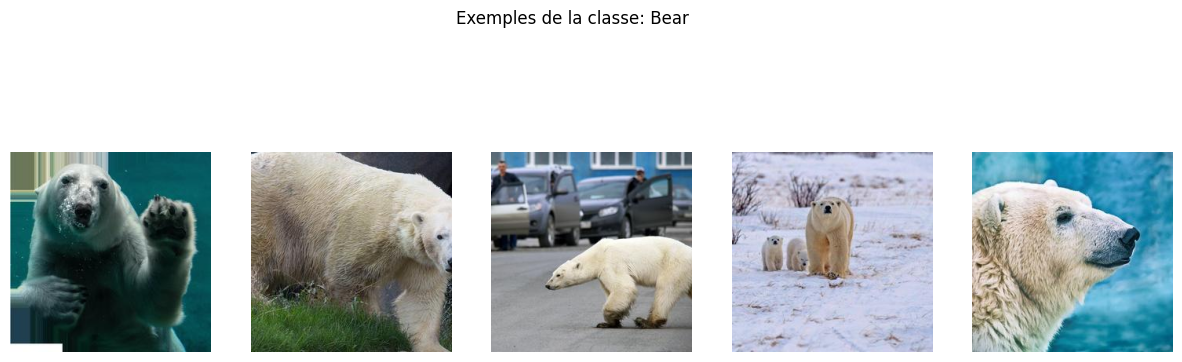

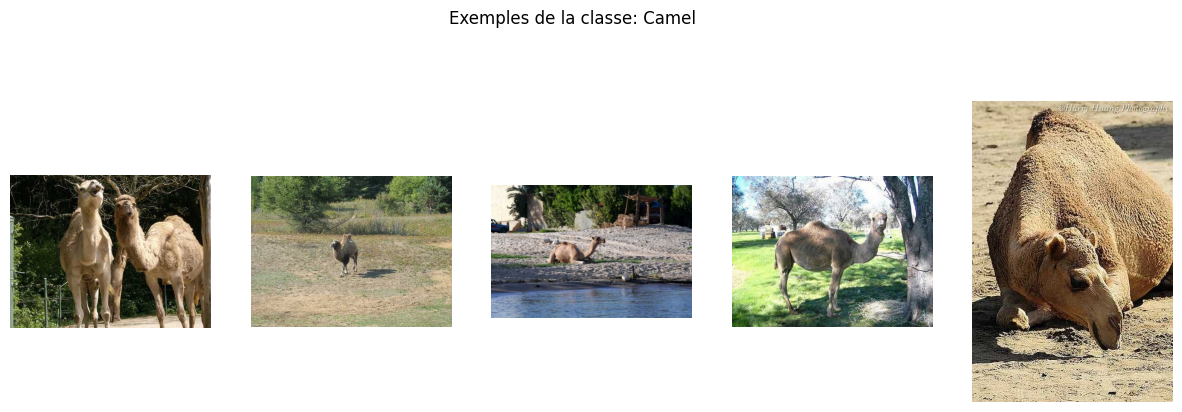

In [7]:
# Afficher des exemples d'images
def show_samples(path, class_name):
    folder_path = os.path.join(path, class_name)
    images = os.listdir(folder_path)[:5]  # Afficher 5 images
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.suptitle(f"Exemples de la classe: {class_name}")
    plt.show()

show_samples(train_path, "Bear")
show_samples(train_path, "Camel")

2. Statistiques descriptives des images


In [8]:

# Obtenir les dimensions des images
def image_stats(path, class_name):
    folder_path = os.path.join(path, class_name)
    widths, heights = [], []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        widths.append(img.size[0])
        heights.append(img.size[1])
    print(f"Classe {class_name} - Largeur moyenne: {np.mean(widths):.2f}, Hauteur moyenne: {np.mean(heights):.2f}")

image_stats(train_path, "Bear")
image_stats(train_path, "Camel")


Classe Bear - Largeur moyenne: 256.00, Hauteur moyenne: 256.00
Classe Camel - Largeur moyenne: 346.76, Hauteur moyenne: 307.63


In [12]:
from PIL import Image
import os

# Fonction pour afficher les tailles des images dans un dossier
def print_image_sizes(folder_path):
    for folder in os.listdir(folder_path):
        folder_full_path = os.path.join(folder_path, folder)
        if os.path.isdir(folder_full_path):
            print(f"\nClasse: {folder}")
            for img_name in os.listdir(folder_full_path):
                img_path = os.path.join(folder_full_path, img_name)
                try:
                    img = Image.open(img_path)
                    print(f"Image: {img_name}, Taille: {img.size}")  # Affiche (largeur, hauteur)
                except Exception as e:
                    print(f"Erreur avec l'image {img_name}: {e}")

# Exemple d'utilisation
train_path = 'DeepLearningTask-1/DeepLearning 24-25/Train'
print_image_sizes(train_path)



Classe: Bear
Image: polar_bear-0001.jpg, Taille: (256, 256)
Image: polar_bear-0002.jpg, Taille: (256, 256)
Image: polar_bear-0003.jpg, Taille: (256, 256)
Image: polar_bear-0004.jpg, Taille: (256, 256)
Image: polar_bear-0005.jpg, Taille: (256, 256)
Image: polar_bear-0006.jpg, Taille: (256, 256)
Image: polar_bear-0007.jpg, Taille: (256, 256)
Image: polar_bear-0008.jpg, Taille: (256, 256)
Image: polar_bear-0009.jpg, Taille: (256, 256)
Image: polar_bear-0010.jpg, Taille: (256, 256)
Image: polar_bear-0011.jpg, Taille: (256, 256)
Image: polar_bear-0012.jpg, Taille: (256, 256)
Image: polar_bear-0013.jpg, Taille: (256, 256)
Image: polar_bear-0014.jpg, Taille: (256, 256)
Image: polar_bear-0015.jpg, Taille: (256, 256)
Image: polar_bear-0016.jpg, Taille: (256, 256)
Image: polar_bear-0017.jpg, Taille: (256, 256)
Image: polar_bear-0018.jpg, Taille: (256, 256)
Image: polar_bear-0019.jpg, Taille: (256, 256)
Image: polar_bear-0020.jpg, Taille: (256, 256)
Image: polar_bear-0021.jpg, Taille: (256, 256)

3. Analyse des classes


Distribution des classes - Entraînement:


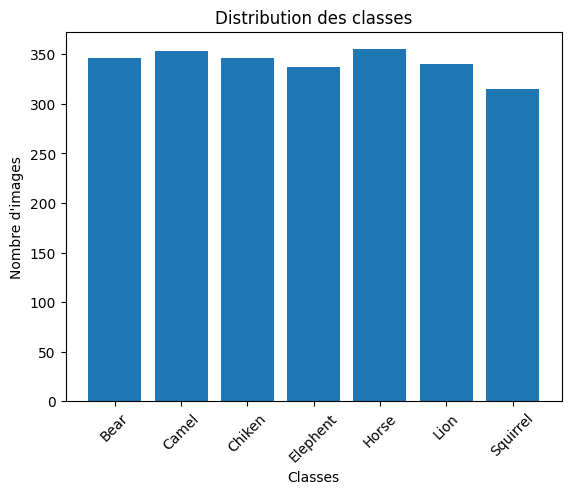

Distribution des classes - Test:


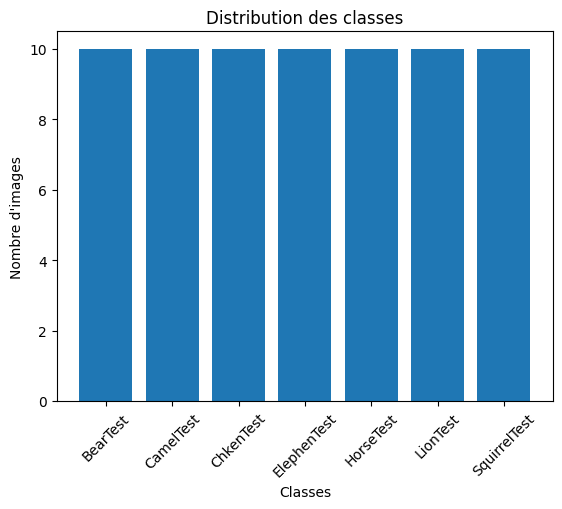

In [9]:

# Compter les images par classe
def plot_class_distribution(path):
    class_counts = {folder: len(os.listdir(os.path.join(path, folder))) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))}
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title("Distribution des classes")
    plt.xlabel("Classes")
    plt.ylabel("Nombre d'images")
    plt.xticks(rotation=45)
    plt.show()

print("Distribution des classes - Entraînement:")
plot_class_distribution(train_path)

print("Distribution des classes - Test:")
plot_class_distribution(test_path)


4. Vérification de la qualité des images


In [10]:
# Vérification des images corrompues
def check_corrupted_images(path):
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                img = Image.open(img_path)
                img.verify()  # Vérifie si l'image est valide
            except Exception as e:
                print(f"Image corrompue détectée: {img_path}, Erreur: {e}")

print("Vérification des images d'entraînement:")
check_corrupted_images(train_path)

print("\nVérification des images de test:")
check_corrupted_images(test_path)


Vérification des images d'entraînement:

Vérification des images de test:


Redimensionner les images à 128x128

In [15]:
def resize_images(input_folder, output_folder, size=(128, 128)):
    """
    Redimensionne toutes les images dans les sous-dossiers de `input_folder`
    et les enregistre dans une structure identique dans `output_folder`.

    :param input_folder: Chemin du dossier contenant les images originales
    :param output_folder: Chemin du dossier pour sauvegarder les images redimensionnées
    :param size: Tuple (largeur, hauteur) pour redimensionner les images
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for folder in os.listdir(input_folder):
        folder_path = os.path.join(input_folder, folder)
        output_subfolder = os.path.join(output_folder, folder)

        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        if os.path.isdir(folder_path):  # Vérifie si c'est un dossier
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                try:
                    img = Image.open(img_path)
                    img_resized = img.resize(size)  # Redimensionne l'image à 128x128
                    img_resized.save(os.path.join(output_subfolder, img_name))
                    print(f"Redimensionné : {img_name} -> {size}")
                except Exception as e:
                    print(f"Erreur avec l'image {img_name} : {e}")

# Exemple d'utilisation
train_path = 'DeepLearningTask-1/DeepLearning 24-25/Train'
test_path = 'DeepLearningTask-1/DeepLearning 24-25/Test'

resize_images(train_path, 'Resized_Train', size=(128, 128))
resize_images(test_path, 'Resized_Test', size=(128, 128))

Redimensionné : polar_bear-0001.jpg -> (128, 128)
Redimensionné : polar_bear-0002.jpg -> (128, 128)
Redimensionné : polar_bear-0003.jpg -> (128, 128)
Redimensionné : polar_bear-0004.jpg -> (128, 128)
Redimensionné : polar_bear-0005.jpg -> (128, 128)
Redimensionné : polar_bear-0006.jpg -> (128, 128)
Redimensionné : polar_bear-0007.jpg -> (128, 128)
Redimensionné : polar_bear-0008.jpg -> (128, 128)
Redimensionné : polar_bear-0009.jpg -> (128, 128)
Redimensionné : polar_bear-0010.jpg -> (128, 128)
Redimensionné : polar_bear-0011.jpg -> (128, 128)
Redimensionné : polar_bear-0012.jpg -> (128, 128)
Redimensionné : polar_bear-0013.jpg -> (128, 128)
Redimensionné : polar_bear-0014.jpg -> (128, 128)
Redimensionné : polar_bear-0015.jpg -> (128, 128)
Redimensionné : polar_bear-0016.jpg -> (128, 128)
Redimensionné : polar_bear-0017.jpg -> (128, 128)
Redimensionné : polar_bear-0018.jpg -> (128, 128)
Redimensionné : polar_bear-0019.jpg -> (128, 128)
Redimensionné : polar_bear-0020.jpg -> (128, 128)


In [19]:

# Afficher une image redimensionnée
img_path = 'C:/Users/hassan/OneDrive/Documents/S9/Deep Learning/Final Project/Resized_Train/Bear/polar_bear-0012.jpg'  # Exemple d'image redimensionnée
img = Image.open(img_path)
print(f"Taille de l'image : {img.size}")  # Vérifie la taille (128, 128)
img.show()  # Affiche l'image


Taille de l'image : (128, 128)


In [1]:
import os
import matplotlib.pyplot as plt

# Path to dataset
dataset_path = 'data/Resized_Train'

# Verify path exists
if not os.path.exists(dataset_path):
    print(f"Error: The dataset path '{dataset_path}' does not exist.")
else:
    # Count images in each category
    class_counts = {}
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):  # Ensure it's a directory
            class_counts[category] = len(os.listdir(category_path))

    # Plot class distribution
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title("Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/Resized_Train'